In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch
import matplotlib.pyplot as plt

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps ) and ALLOW_MPS:
    DEVICE = "mps"
print(f"DEVICE: {DEVICE}")

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json", merges_file="../data/tokenizer_merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

DEVICE: cpu


c:\Users\surajp\miniconda3\envs\signals\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


 10%|█         | 1/10 [00:09<01:22,  9.15s/it]

tensor(-0.0057)


 20%|██        | 2/10 [00:18<01:13,  9.15s/it]

tensor(-0.0072)


 30%|███       | 3/10 [00:28<01:06,  9.50s/it]

tensor(-0.0157)


 40%|████      | 4/10 [00:38<00:58,  9.73s/it]

tensor(-0.0190)


 50%|█████     | 5/10 [00:48<00:49,  9.83s/it]

tensor(-0.0188)


 60%|██████    | 6/10 [00:58<00:39,  9.79s/it]

tensor(-0.0239)


 70%|███████   | 7/10 [01:07<00:29,  9.75s/it]

tensor(-0.0293)


 80%|████████  | 8/10 [01:17<00:19,  9.79s/it]

tensor(-0.0320)


 90%|█████████ | 9/10 [01:26<00:09,  9.64s/it]

tensor(-0.0332)


100%|██████████| 10/10 [01:36<00:00,  9.66s/it]

tensor(-0.0332)


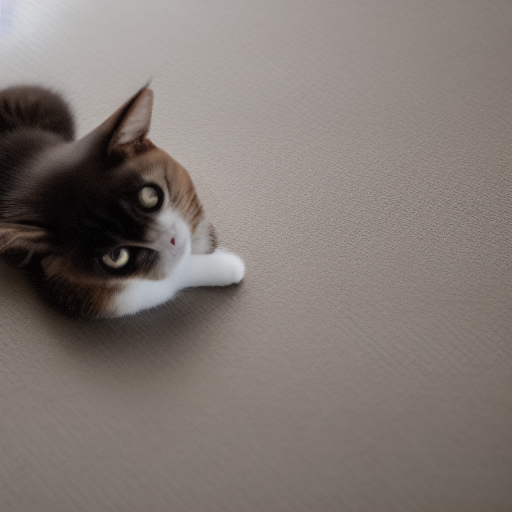

In [3]:
prompt = "A cute cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""
do_cfg=True
cfg_scale = 8

input_image = None
image_path = "../images/image.png"
# input_image = Image.open(image_path) # this model wansn't trained for in-painting
strength = 0.9

sampler = "ddpm"
num_inference_steps = 5
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)